In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from wrangle import wrangle_telco

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,...,Yes,No,Yes,Yes,No,Yes,2,2,1,No
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,...,No,No,No,No,Yes,No,1,2,1,No
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,...,No,Yes,No,No,No,Yes,1,1,2,Yes
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,...,Yes,Yes,No,Yes,Yes,Yes,1,1,2,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,...,No,No,Yes,Yes,No,Yes,1,2,2,Yes


In [4]:
df.streaming_tv

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042    Yes
Name: streaming_tv, Length: 7043, dtype: object

### encode

In [5]:
# step 1 split
train, test = train_test_split(df)

In [6]:
# step 2 encode, no = 0, yes = 1 
encoder = LabelEncoder()

encode_list = [
    'gender', 'partner', 'dependents', 'phone_service'
    , 'multiple_lines', 'online_security', 'online_backup'
    , 'device_protection', 'tech_support'
    , 'streaming_movies', 'streaming_tv', 'paperless_billing', 'churn'
    ]
               
               
               
for c in encode_list:
    train[c] = encoder.fit_transform(train[c])
    test[c] = encoder.transform(test[c])

In [7]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn
5725,8062-YBDOE,1,1,0,0,1,69.65,69.65,1,0,...,0,0,0,0,0,1,1,1,2,1
3246,4644-PIZRT,1,0,1,1,17,70.35,1201.65,1,2,...,0,2,0,2,0,1,2,3,1,0
2042,2937-FTHUR,0,0,0,1,18,64.80,1166.70,1,2,...,0,0,0,0,2,0,1,1,1,0
5276,7445-WMRBW,0,0,0,0,48,73.85,3581.40,1,2,...,2,2,2,2,0,1,2,3,1,0
4625,6519-CFDBX,0,0,0,0,2,45.40,80.95,1,0,...,0,0,0,0,0,1,1,1,1,0


### Distribution of churn rates

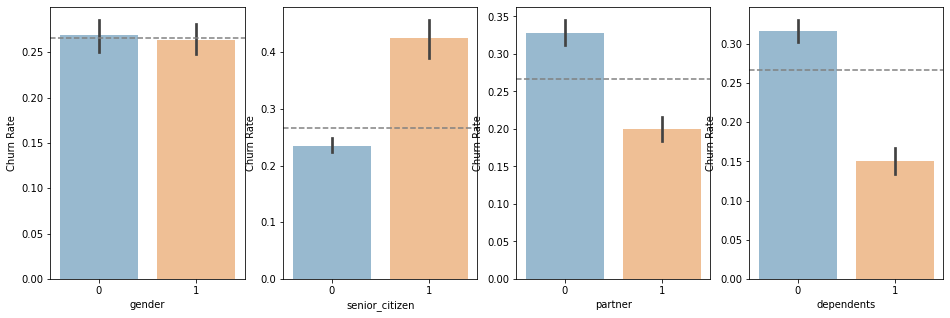

In [8]:
features = ['gender', 'senior_citizen', 'partner', 'dependents']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')


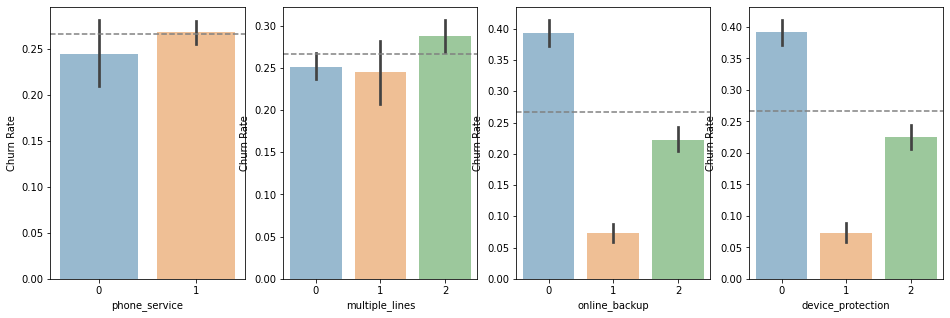

In [9]:
features = ['phone_service', 'multiple_lines', 'online_backup', 'device_protection']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [10]:
df.device_protection

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042    Yes
Name: device_protection, Length: 7043, dtype: object

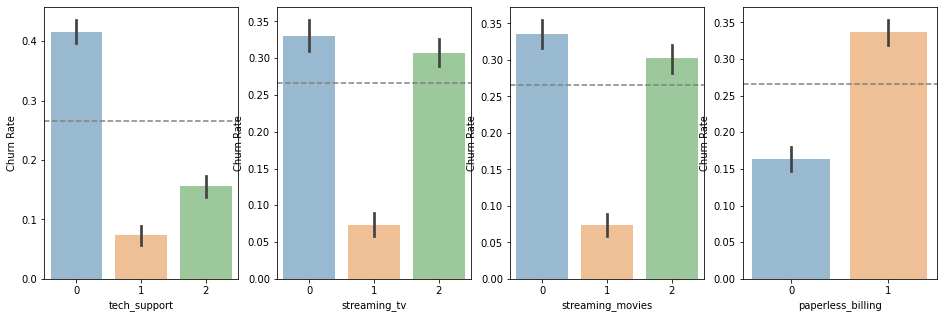

In [11]:
features = ['tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

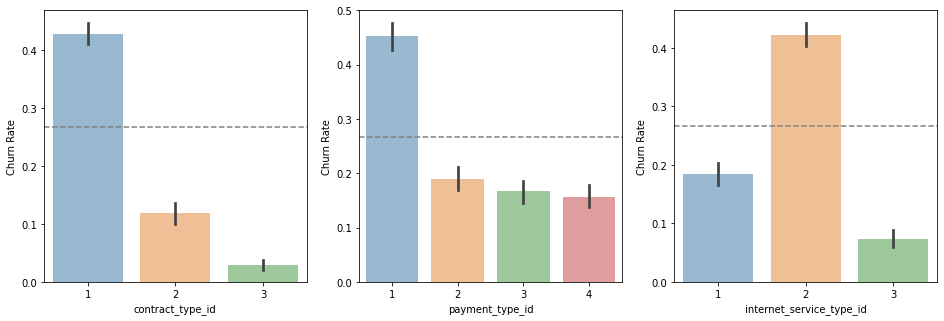

In [14]:
features = ['contract_type_id', 'payment_type_id', 'internet_service_type_id']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [13]:
df.contract_type_id.value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

### modeling

In [ ]:
# creating our X, y and validate datasets

train, validate = train_test_split(train, random_state=123, test_size=.2)


X_train = train[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_train = train[['churn']]
X_val = validate[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_val = validate[['churn']]
X_test = test[['senior_citizen', 'multiple_lines', 'streaming_tv', 'paperless_billing', 'contract_type']]
y_test = test[['churn']]

# KNN

In [ ]:
# training and fitting a k-nearest neighbors algorithim to our training data
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))

### Accuracy on validation set

In [ ]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_val, y_val)))

### messing with something i found on towards data science lol

In [ ]:
X = train.drop(columns=['customer_id', 'churn', 'payment_type', 'internet_service_type'])
y = train.churn.to_numpy()
y[0:5]

In [ ]:
# cross validation is suppose to make our model more accurate somehow...blackbox'in'itt
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

In [ ]:
# hypertuning mode parameters
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

## Random Forest 

In [ ]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [ ]:
# evaluating model
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

In [ ]:
print(classification_report(y_train, y_pred))

### Validate scores

In [ ]:
print('Accuracy of random forest classifier on val set: {:.2f}'
     .format(rf.score(X_val, y_val)))

# Test score

In [ ]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

In [ ]:
X_test

In [ ]:
X_train

## creating a CSV
- customer ID
- probability of churn
- prediction of churn

#### using the most accurate model: RF

In [ ]:
# now we concat all of our data frames so we have a good index
rf_predictions = pd.concat([X_train, X_test, X_val])

In [ ]:
rf_predictions

In [ ]:
# we add our predictions
y_pred = rf.predict(rf_predictions)

y_pred

In [ ]:
# we add our probabilities
y_pred_proba = rf.predict_proba(rf_predictions)

y_pred_proba

In [ ]:
# now we put it all together
predictions = pd.DataFrame(
    {'Customer_ID': df.customer_id,
     'Stay_Probability': y_pred_proba[:,0],
        'Churn_Probability': y_pred_proba[:,1],
     'Churn_Prediction': y_pred})

In [ ]:
predictions['actual'] = df.churn

In [ ]:
predictions.sample(50)

In [ ]:
predictions.Churn_Prediction.sum() / 5174

In [ ]:
predictions.groupby('actual').count()

In [ ]:
1869 / 5174

In [ ]:
predictions.to_csv('telco_churn_predictions.csv')